<a href="https://colab.research.google.com/github/sonsuin/DataAnalytical_PersonalProject/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8B%A4%EC%8A%B501_Starwars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data 01: 스타워즈(Starwars)

*   스타워즈 API([SWAP](https://swapi.dev/)) 의 데이터로 스타워즈에 등장하는 캐릭터들의 특징을 나타내고 있다.
*   Data from: https://dplyr.tidyverse.org/reference/starwars.html



##1.데이터 둘러보기

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,273 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 폰트 가져오기

plt.style.use('seaborn') #그래프 기본 설정
sns.set(font_scale=1)

import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%pwd

'/content'

In [11]:
#데이터 불러오기
#구글 드라이브에 올려준 csv 데이터 파일 불러오기
sw = pd.read_csv('/content/drive/MyDrive/data/Starwars.csv')

In [12]:
#불러온 데이터 일단 확인하기
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


<컬럼 설명>   
* name: 캐릭터 이름  
* height: 키  
* mass: 몸무게  
* hair_color: 머리카락 색  
* skin_color: 피부색  
* eye_color: 눈동자 색  
* birth_year: 생년  
* sex: 생물학적 성별  
* gender: 사회적 성별  
* homeworld: 고향  
* species: 종

* 범주형 변수: *빈도frequency 계산 가능*
               name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               height, mass, birth_year

In [14]:
#컬럼 기본 정보 확인하기
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [15]:
#연속형(수치) 데이터의 통계치 확인하기
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [16]:
#범주형 데이터의 통계치 확인하기
sw.describe(include=np.object)

<ipython-input-16-1aa90218c52e>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sw.describe(include=np.object)


,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [17]:
#범주형 데이터 컬럼 안에는 어떤 내용이 들어있을까?
print('Hair color: ', sw['hair_color'].unique())
print('Skin color: ', sw['skin_color'].unique())
print('Eye color: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())
#범주가 적으면 범주 별 그래프를 그리기 쉽다
#이 데이터에서는 sex, gender!

Hair color:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin color:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye color:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Malasta

In [20]:
sw.shape

(87, 11)

In [21]:
sw.shape[0]

87

In [22]:
sw.shape[1]

11

In [24]:
sw.isnull().head(2)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False


In [25]:
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [26]:
sw.isnull().sum().sum()

105

In [31]:
#데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", sw.shape[0]*sw.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("스타워즈에 등장하는 등장인물 수: ", sw['name'].nunique())
print("스타워즈에 등장하는 종족 수: ", sw['species'].nunique())

총 데이터 개수:  957
총 결측치 수: 105 = 전체 데이터의 10.97% 
스타워즈에 등장하는 등장인물 수:  87
스타워즈에 등장하는 종족 수:  37


##2.데이터를 보고 질문 만들기
* 스타워즈 캐릭터의 성별 비율은?
* 성별에 따른 캐릭터 신장의 분포는?
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
* 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?

##3.데이터 정비하기

###3-1.결측치 처리하기

In [33]:
#NULL이 존재하는 컬럼 확인하기 
sw.isnull().any(axis=0)
#height, mass, type, x, y 컬럼에 NaN 존재한다

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [34]:
#컬럼별로 NULL 개수 확인하기
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [37]:
#어떤 컬럼의 결측치를 처리할것인가?
#hair color, sex, gender, homeworld, species의 경우 개인 특성이므로 다른 값을 넣어주는 것이 의미가 없다
#height, mass에서는 결측치를 0으로 처리해보자
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [38]:
#sex에 none도 있고 NaN도 있다? 
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [39]:
sw['sex'].unique()

array(['male', 'none', 'female', 'hermaphroditic', nan], dtype=object)

In [40]:
#sex = none 인 것들은 species = Droid이므로, 컬럼 내용을 바꿔보자
sw['sex'][sw['sex']=='none']= 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


<ipython-input-40-77ccc9be43e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['sex'][sw['sex']=='none']= 'robot'


##4.EDA & Visualization

###4-1. 스타워즈 캐릭터의 성별 비율

In [41]:
#스타워즈 캐릭터의 성비(sex, gender)는?
sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

In [43]:
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

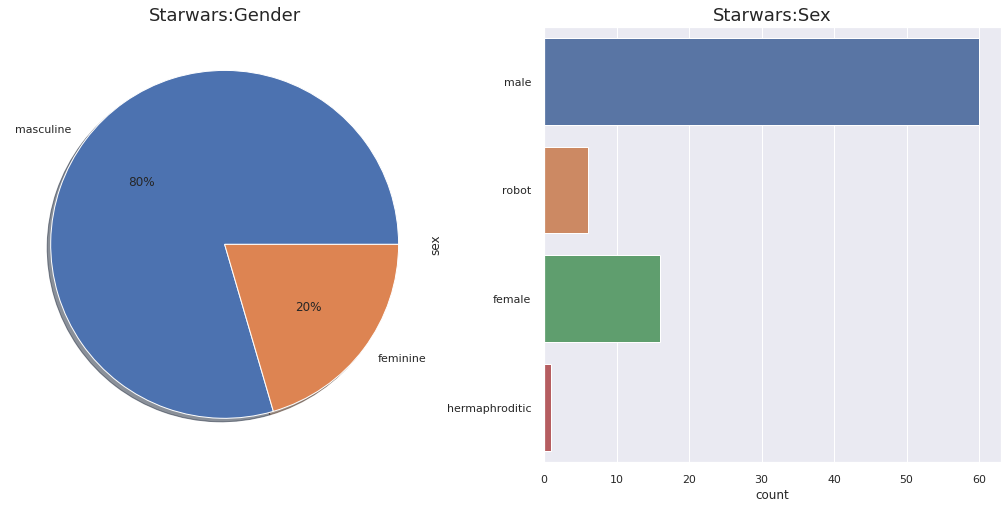

In [44]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #그래프 틀 정하기 -> 1행 1열

sw['gender'].value_counts().plot.pie(ax=ax[0],
                                     autopct='%1.0f%%',
                                     shadow=True) #파이그래프 그리기
ax[0].set_title('Starwars:Gender',
                size=18) #그래프 제목
ax[0].set_ylabel('') #y 라벨 없애기

#sns.countplot
#항목별 갯수를 세어주는 countplot
#알아서 해당 column을 구성하고 있는 value들을 구분하여 보여준다.
# 차트 가로로 그리기 : x를 y로 변경하면 세로에서 가로 차트로 변경 가능
sns.countplot(data=sw,
              y='sex',
              ax = ax[1])
ax[1].set_title('Starwars:Sex',
                size=18) #그래프 제목

plt.show()

###4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [45]:
#스타워즈 캐릭터의 신장 확인하기
#연속형(수치) 데이터의 통계치 확인하기: 최솟값과 최댓값
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [47]:
#skewness and kurtosis 구하기
#Skewness(왜도): 데이터가 정규분포에서 한 쪽으로 치우쳐있는가?
#                -3 < skewness < 3 사이의 값이면 기준에 부합한다
#Kurtosis(첨도): 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가)?
#               : 정규분포의 kurtosis = 0
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [49]:
#자웅동체(hermaphroditic) 캐릭터(Jabba Desilijic Tiure)는 하나 뿐이므로 확률분포를 구하는것이 불가능!
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


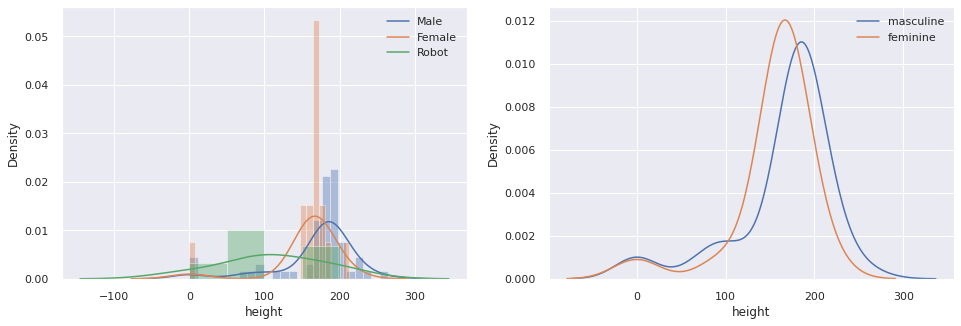

In [51]:
#성별에 따른 스타워즈 캐릭터의 신장 분포 그래프
#자웅동체 캐릭터(Jabba Desilijic Tiure)는 하나 뿐이므로 확률분포를 구하는것이 불가능!

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['Male','Female','Robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['masculine','feminine'])

plt.show()

###4-3. 가장 가벼운 캐릭터와 가장 무거운 캐릭터

In [52]:
#몸무게가 가장 가벼운 캐릭터
notz = sw[sw['mass'] != 0]  #몸무게가 0인 것은 제외하자!
min(notz['mass'])

15.0

In [53]:
#데이터 내용 정리해서 출력하기
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다 
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다 


###4-4.스타워즈 캐릭터의 종족 간 몸무게 비교

In [69]:
#Groupby로 스타워즈 종족 별 평균 몸무게를 계산해보자
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


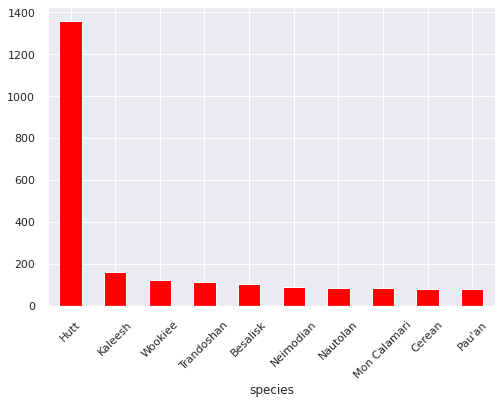

In [70]:
#몸무게 많은 순으로 상위 10개 종족을 그래프로 그려보자
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

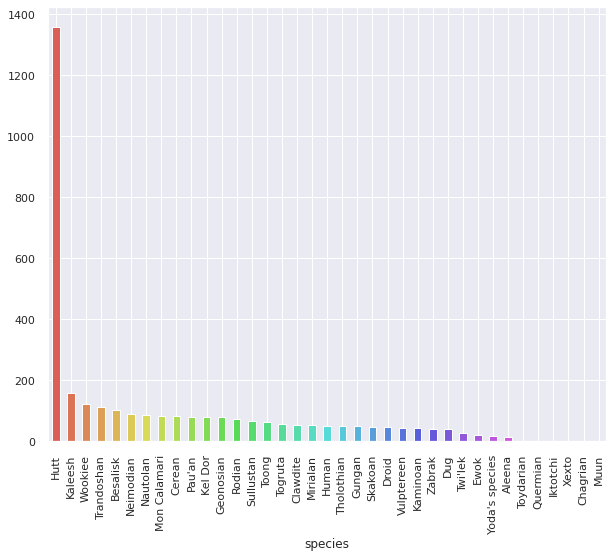

In [71]:
#스타워즈 종족별 몸무게 많은 순으로 그래프를 그려보자
f, ax = plt.subplots(1, 1, figsize=(10,8))

colors = sns.color_palette('hls',len(weight['mass'])) #hls라는 컬러팔레트에서 어떤 컬러를 입혀줄지 결정

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90) #라벨이 겹쳐져서 보이니까 90도 돌려준다

plt.show()

###4-5. 스타워즈 캐릭터의 무게-키 상관관계

In [81]:
sw['mass'].value_counts()


0.0       28
80.0       6
79.0       4
77.0       3
75.0       3
84.0       3
55.0       2
45.0       2
50.0       2
82.0       2
48.0       2
136.0      2
32.0       2
88.0       1
66.0       1
56.2       1
85.0       1
15.0       1
87.0       1
65.0       1
57.0       1
40.0       1
102.0      1
20.0       1
90.0       1
89.0       1
68.0       1
83.0       1
113.0      1
140.0      1
78.2       1
17.0       1
110.0      1
1358.0     1
74.0       1
112.0      1
120.0      1
49.0       1
159.0      1
Name: mass, dtype: int64

In [83]:
#Hutt은 몸무게가 너무 outlier 하므로 out시키자!
#몸무게가 0인 것도 제외시키자!
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin([0])
sw[~out1][~out2].shape

<ipython-input-83-4e3d60c6794b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sw[~out1][~out2].shape


(58, 11)

<ipython-input-86-ab2debd82ec9>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender')


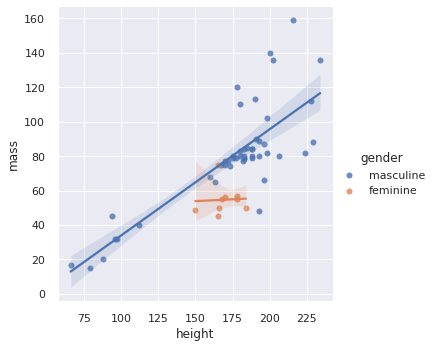

In [86]:
#두 데이터 사이의 상관관계를 나타내주는 lmplot
#replot은 점만 나타난다

sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender')
sns.set_style(style='darkgrid') #어두운 그리드로 배경 지정

plt.show()

##5.Review

* 스타워즈 데이터는:  
총 데이터 개수:  957  
총 결측치 수: 105 = 전체 데이터의 10.97%   
스타워즈에 등장하는 등장인물 수:  87  
스타워즈에 등장하는 종족 수:  37  

* 스타워즈 캐릭터의 성별 비율은?  
  : 남성/남성 gender를 가진 캐릭터가 80% 가량을 차지한다.
* 성별에 따른 캐릭터 신장의 분포는?  
  : 남성 캐릭터의 키가 대체로 여성보다 크며, 로봇은 그보다 키가 작다.
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?  
  : ['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다   
    ['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다 
* 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?  
  : 그렇다. 인간과 다른 행성에 사는 종족이지만, 키와 몸무게는 대체로 비례 관계를 보인다.